<a href="https://colab.research.google.com/github/lionheart7dec/playing_with_mnist/blob/master/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

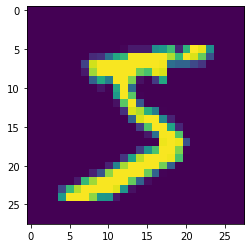

In [42]:
plt.imshow(x_train[0])

In [0]:
only_zeroes = x_train[y_train==0]

In [33]:
only_zeroes.shape

(5923, 28, 28)

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [0]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape =[28,28]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(100, activation = 'relu'))

#Final Output Layer 
discriminator.add(Dense(1, activation = 'sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer = 'adam')

In [0]:
codings_size = 100
#100 -- 150 --> 784

generator = Sequential()
discriminator.add(Dense(100, activation = 'relu', input_shape = [codings_size]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(784, activation = 'relu'))
generator.add(Reshape([28,28]))

In [0]:
GAN = Sequential([generator, discriminator])

In [0]:
discriminator.trainable = False

In [0]:
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [0]:
batch_size = 32

In [0]:
my_data = only_zeroes

In [0]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size = 1000)

In [46]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [0]:
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

In [0]:
epochs = 1

In [49]:
GAN.layers[1].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
_________________________________________________________________
dense_12 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_13 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_14 (Dense)             (None, 784)              

In [51]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f'Currently on Epoch {epoch+1}')
  i=0

  for x_batch in dataset:

    i = i+1

    if i%100 ==0:
      print(f'\t Currently on batch number{i} of (len{my_data}//batch_size)')

    # Discrimator

    noise = tf.random.normal(shape =[batch_size, codings_size])

    gen_images = generator(noise)

    x_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(x_batch, tf.float32)], axis = 0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    discriminator.trainable = True

    discriminator.train_on_batch(x_fake_vs_real, y1)


    # Training Generating
    noise = tf.random.normal(shape=[batch_size, codings_size])
    y2 = tf.constant( [[1.0]]*batch_size)




Currently on Epoch 1


InvalidArgumentError: ignored